In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import os
import sys

In [2]:
# Import data
df = pd.read_excel("raw_data.xlsx")

In [3]:
df.head()

,Campus Community Notified,Date SMU was Notified of Positive Test,Last Known Date on Campus,Description,Active
0,2020-08-28,2020-08-27,2020-08-24,A student who lives off campus,1
1,2020-08-28,2020-08-27,2020-08-27,A student who lives off campus,1
2,2020-08-28,2020-08-27,2020-08-27,A student who lives on campus,1
3,2020-08-28,2020-08-27,2020-08-27,A student who lives on campus,1
4,2020-08-28,2020-08-27,2020-08-27,A student who lives off campus,1


# Active Cases

In [4]:
temp = df.copy()
temp_smu_dates = np.sort(temp["Date SMU was Notified of Positive Test"].unique())

In [5]:
counts = np.zeros(len(temp_smu_dates))
for i in range(len(temp_smu_dates)):
    sub_count = len(temp[temp["Campus Community Notified"] == temp_smu_dates[i]])
    counts[i] = sub_count

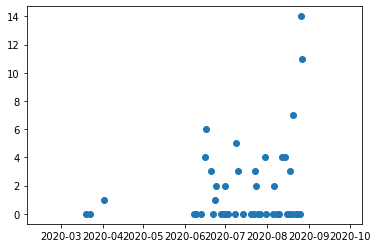

In [6]:
plt.scatter(temp_smu_dates, counts)

Text(0, 0.5, '# of Cases')

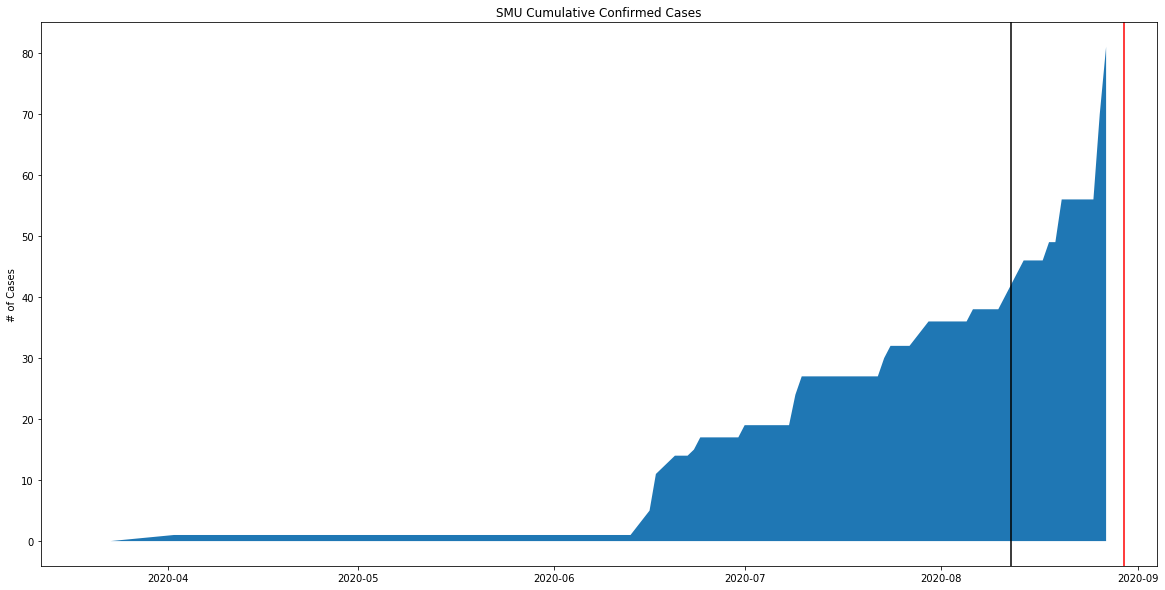

In [31]:
#plt.plot(temp_smu_dates, np.cumsum(counts))
plt.figure(figsize=(20,10))
plt.fill_between(temp_smu_dates, np.cumsum(counts))
plt.title("SMU Cumulative Confirmed Cases")
plt.axvline(np.datetime64(dt.datetime.strptime("20-08-12", "%y-%m-%d")), ymin=0, c="k")
plt.axvline(np.datetime64(dt.datetime.now()), ymin=0, c="r")
plt.ylabel("# of Cases")

In [23]:
np.datetime64(dt.datetime.strptime("20-08-12", "%y-%m-%d"))

False

In [30]:
np.datetime64(dt.datetime.now())

numpy.datetime64('2020-08-29T19:18:31.555429')

In [33]:
d = {'Date': temp_smu_dates, 'Cases Reported to SMU': counts, "Cumulative Cases": np.cumsum(counts) }
d = pd.DataFrame(data=d)

In [34]:
d.head()


,Date,Cases Reported to SMU,Cumulative Cases
0,2020-03-20,0.0,0.0
1,2020-03-23,0.0,0.0
2,2020-04-02,1.0,1.0
3,2020-06-08,0.0,1.0
4,2020-06-09,0.0,1.0


In [35]:
d.to_csv("cleaned_case_data.csv", index=False)

array(['2020-03-20T00:00:00.000000000', '2020-03-23T00:00:00.000000000',
       '2020-04-02T00:00:00.000000000', '2020-06-08T00:00:00.000000000',
       '2020-06-09T00:00:00.000000000', '2020-06-13T00:00:00.000000000',
       '2020-06-16T00:00:00.000000000', '2020-06-17T00:00:00.000000000',
       '2020-06-20T00:00:00.000000000', '2020-06-22T00:00:00.000000000',
       '2020-06-23T00:00:00.000000000', '2020-06-24T00:00:00.000000000',
       '2020-06-28T00:00:00.000000000', '2020-06-30T00:00:00.000000000',
       '2020-07-01T00:00:00.000000000', '2020-07-02T00:00:00.000000000',
       '2020-07-03T00:00:00.000000000', '2020-07-08T00:00:00.000000000',
       '2020-07-09T00:00:00.000000000', '2020-07-10T00:00:00.000000000',
       '2020-07-14T00:00:00.000000000', '2020-07-20T00:00:00.000000000',
       '2020-07-22T00:00:00.000000000', '2020-07-23T00:00:00.000000000',
       '2020-07-24T00:00:00.000000000', '2020-07-25T00:00:00.000000000',
       '2020-07-27T00:00:00.000000000', '2020-07-30